## Annotating the variants of genes of the patient from the gencode database

In [1]:
gene_annotations_filename = "gencode.v18.annotation.gtf"
variant_filename = 'Metabolic_variants.vcf'

In [2]:
from gtfparse import read_gtf
# returns GTF with essential columns such as "feature", "seqname", "start", "end"
# alongside the names of any optional keys which appeared in the attribute column
df = read_gtf(gene_annotations_filename)

INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_type', 'gene_status', 'gene_name', 'transcript_type', 'transcript_status', 'transcript_name', 'level', 'havana_gene', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'ont', 'ccdsid']


In [3]:
# filter DataFrame to gene entries on chrY
df_genes = df[df["feature"] == "gene"]
df_genes.head()

,seqname,source,feature,start,end,score,strand,frame,gene_id,transcript_id,...,transcript_status,transcript_name,level,havana_gene,tag,havana_transcript,exon_number,exon_id,ont,ccdsid
0,chr1,HAVANA,gene,11869,14412,NaN,+,0,ENSG00000223972.4,ENSG00000223972.4,...,KNOWN,DDX11L1,2,OTTHUMG00000000961.2,,,,,,
21,chr1,HAVANA,gene,14363,29806,NaN,-,0,ENSG00000227232.4,ENSG00000227232.4,...,KNOWN,WASH7P,2,OTTHUMG00000000958.1,,,,,,
82,chr1,HAVANA,gene,29554,31109,NaN,+,0,ENSG00000243485.2,ENSG00000243485.2,...,NOVEL,MIR1302-11,2,OTTHUMG00000000959.2,,,,,,
92,chr1,HAVANA,gene,34554,36081,NaN,-,0,ENSG00000237613.2,ENSG00000237613.2,...,KNOWN,FAM138A,2,OTTHUMG00000000960.1,,,,,,
100,chr1,HAVANA,gene,52473,54936,NaN,+,0,ENSG00000268020.2,ENSG00000268020.2,...,KNOWN,OR4G4P,2,OTTHUMG00000185779.1,,,,,,


In [4]:
df_genes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57445 entries, 0 to 2614559
Data columns (total 24 columns):
seqname              57445 non-null object
source               57445 non-null object
feature              57445 non-null object
start                57445 non-null int64
end                  57445 non-null int64
score                0 non-null float32
strand               57445 non-null object
frame                57445 non-null object
gene_id              57445 non-null object
transcript_id        57445 non-null object
gene_type            57445 non-null object
gene_status          57445 non-null object
gene_name            57445 non-null object
transcript_type      57445 non-null object
transcript_status    57445 non-null object
transcript_name      57445 non-null object
level                57445 non-null object
havana_gene          57445 non-null object
tag                  57445 non-null object
havana_transcript    57445 non-null object
exon_number          57445 non-nul

In [5]:
df_genes.columns

Index(['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand',
       'frame', 'gene_id', 'transcript_id', 'gene_type', 'gene_status',
       'gene_name', 'transcript_type', 'transcript_status', 'transcript_name',
       'level', 'havana_gene', 'tag', 'havana_transcript', 'exon_number',
       'exon_id', 'ont', 'ccdsid'],
      dtype='object')

In [6]:
df_genes['seqname'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22',
       'chrX', 'chrY', 'chrM'], dtype=object)

## Look into the list of variants and find correspondance to the gene from the gencode file

In [7]:
import vcf
import pandas as pd

vcf_reader = vcf.Reader(open(variant_filename, 'r'))
variants = pd.DataFrame(columns=['CHROM', 'start', 'end', 'strand', 'gene_id', 'transcript_id', 'gene_type', 'gene_status',
       'gene_name', 'transcript_type', 'transcript_status', 'transcript_name', 'POS','REF','ALT','FILTER'])

#CHROM	POS	ID	REF	ALT	QUAL	FILTER

In [ ]:
counter = 0
for record in vcf_reader:
    chrom = record.CHROM
    pos = record.POS
    ref = record.REF
    alt = record.ALT
    filter_pass = record.FILTER
    for row in df_genes.itertuples():
        #print(str(chrom), row.seqname[3:])
        there_is_entry = str(chrom) == row.seqname[3:] and pos > row.start and pos < row.end
        if there_is_entry:
            new_row = {'POS': pos, 'start': row.start, 'end': row.end, 'strand': row.strand, 'gene_id' : row.gene_id, 'transcript_id' : row.transcript_id, 'gene_type' : row.gene_type, 'gene_status': row.gene_status, 'gene_name' : row.gene_name, 'transcript_type' : row.transcript_type, 'transcript_status': row.transcript_status, 'transcript_name' : row.transcript_name, 'CHROM' : chrom, 'POS': pos,'REF':ref,'ALT':alt,'FILTER':filter_pass}
            variants = variants.append(new_row, ignore_index=True)
            counter += 1
            #print(counter)
            if counter % 100 == 0:
                print(variants.tail())

In [113]:
gene_disease = pd.read_table('curated_gene_disease_associations.tsv')

In [114]:
gene_disease.tail()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
81741,109580095,HBB-LCR,0.815,0.069,C0002875,Cooley's anemia,disease,C15;C16,Disease or Syndrome,0.3,NaN,NaN,NaN,0,0,CTD_human
81742,109580095,HBB-LCR,0.815,0.069,C0005283,beta Thalassemia,disease,C15;C16,Disease or Syndrome,0.3,NaN,NaN,NaN,0,0,CTD_human
81743,109580095,HBB-LCR,0.815,0.069,C0019025,Hemoglobin F Disease,disease,C15;C16,Disease or Syndrome,0.3,NaN,NaN,NaN,0,0,CTD_human
81744,109580095,HBB-LCR,0.815,0.069,C0085578,Thalassemia Minor,disease,C15;C16,Disease or Syndrome,0.3,NaN,NaN,NaN,0,0,CTD_human
81745,109580095,HBB-LCR,0.815,0.069,C0271979,Thalassemia Intermedia,disease,C15;C16,Disease or Syndrome,0.3,NaN,NaN,NaN,0,0,CTD_human


In [115]:
gene_disease[gene_disease.diseaseId == 'C0019025']

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
6822,790,CAD,0.557,0.655,C0019025,Hemoglobin F Disease,disease,C15;C16,Disease or Syndrome,0.30,NaN,1979.0,1979.0,1,0,CTD_human
14149,1723,DHODH,0.621,0.621,C0019025,Hemoglobin F Disease,disease,C15;C16,Disease or Syndrome,0.30,NaN,1979.0,1979.0,1,0,CTD_human
16472,2056,EPO,0.425,0.759,C0019025,Hemoglobin F Disease,disease,C15;C16,Disease or Syndrome,0.30,NaN,2006.0,2006.0,1,0,CTD_human
23329,3040,HBA2,0.524,0.724,C0019025,Hemoglobin F Disease,disease,C15;C16,Disease or Syndrome,0.31,1.0,1982.0,2007.0,1,0,CTD_human
23351,3043,HBB,0.513,0.793,C0019025,Hemoglobin F Disease,disease,C15;C16,Disease or Syndrome,0.60,1.0,1979.0,2017.0,6,0,CTD_human;ORPHANET
23383,3047,HBG1,0.639,0.448,C0019025,Hemoglobin F Disease,disease,C15;C16,Disease or Syndrome,0.40,1.0,1982.0,2010.0,0,0,ORPHANET
23390,3048,HBG2,0.636,0.552,C0019025,Hemoglobin F Disease,disease,C15;C16,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,ORPHANET
30758,3934,LCN2,0.469,0.793,C0019025,Hemoglobin F Disease,disease,C15;C16,Disease or Syndrome,0.30,NaN,2006.0,2006.0,1,0,CTD_human
51059,7036,TFR2,0.594,0.517,C0019025,Hemoglobin F Disease,disease,C15;C16,Disease or Syndrome,0.30,NaN,2006.0,2006.0,1,0,CTD_human
51080,7037,TFRC,0.471,0.759,C0019025,Hemoglobin F Disease,disease,C15;C16,Disease or Syndrome,0.30,NaN,2006.0,2006.0,1,0,CTD_human


In [116]:
len(gene_disease.geneId.unique()), len(gene_disease.diseaseId.unique())

(9413, 10370)

## Creating a table of associated diseases for every  mutated gene of the patient 

In [123]:
metabolic_filename = 'shortened_metabolic.csv'
pediatric_filename = 'shortened_Pediatric.csv'
carrier_filename = 'shortened_Carrier.csv'
cardioneuro_filename = 'shortened_CardioNeuro.csv'
exome_filename = 'shortened_Exome.csv'


metabolic_var_genes = pd.read_csv(metabolic_filename)
pediatric_var_genes = pd.read_csv(pediatric_filename)
carrier_var_genes = pd.read_csv(carrier_filename)
cardioneuro_var_genes = pd.read_csv(cardioneuro_filename)
exome_var_genes = pd.read_csv(exome_filename)

metabolic_diseases = pd.DataFrame()
pediatric_diseases = pd.DataFrame()
carrier_diseases = pd.DataFrame()
cardioneuro_diseases = pd.DataFrame()
exome_diseases = pd.DataFrame()

for variant in metabolic_var_genes.itertuples():
    metabolic_diseases = metabolic_diseases.append(gene_disease[gene_disease.geneSymbol == variant.gene_name])

for variant in pediatric_var_genes.itertuples():
    pediatric_diseases = pediatric_diseases.append(gene_disease[gene_disease.geneSymbol == variant.gene_name])

for variant in carrier_var_genes.itertuples():
    carrier_diseases = carrier_diseases.append(gene_disease[gene_disease.geneSymbol == variant.gene_name])

for variant in cardioneuro_var_genes.itertuples():
    cardioneuro_diseases = cardioneuro_diseases.append(gene_disease[gene_disease.geneSymbol == variant.gene_name])

for variant in exome_var_genes.itertuples():
    exome_diseases = exome_diseases.append(gene_disease[gene_disease.geneSymbol == variant.gene_name])


In [127]:
exome_var_genes.head()

,Unnamed: 0,CHROM,start,end,strand,gene_id,transcript_id,gene_type,gene_status,gene_name,transcript_type,transcript_status,transcript_name,POS,REF,ALT,FILTER


In [125]:
metabolic_diseases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 49215 to 50434
Data columns (total 16 columns):
geneId                 616 non-null int64
geneSymbol             616 non-null object
DSI                    616 non-null float64
DPI                    616 non-null float64
diseaseId              616 non-null object
diseaseName            616 non-null object
diseaseType            616 non-null object
diseaseClass           554 non-null object
diseaseSemanticType    616 non-null object
score                  616 non-null float64
EI                     183 non-null float64
YearInitial            532 non-null float64
YearFinal              532 non-null float64
NofPmids               616 non-null int64
NofSnps                616 non-null int64
source                 616 non-null object
dtypes: float64(6), int64(3), object(7)
memory usage: 81.8+ KB


In [126]:
exome_diseases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [27]:
pediatric_diseases.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
75346,90529,STPG1,1.000,0.069,C0006142,Malignant neoplasm of breast,disease,C04;C17,Neoplastic Process,0.3,NaN,NaN,NaN,0,0,UNIPROT
73351,79753,SNIP1,0.685,0.345,C3281055,"PSYCHOMOTOR RETARDATION, EPILEPSY, AND CRANIOF...",disease,NaN,Disease or Syndrome,0.4,NaN,2012.0,2012.0,1,1,UNIPROT
73352,79753,SNIP1,0.685,0.345,C3714756,Intellectual Disability,group,C10;C23;F01;F03,Mental or Behavioral Dysfunction,0.3,NaN,2012.0,2012.0,1,0,GENOMICS_ENGLAND
44983,6121,RPE65,0.479,0.759,C0015398,"Eye Diseases, Hereditary",group,C11;C16,Disease or Syndrome,0.3,NaN,2007.0,2007.0,1,0,CTD_human
44984,6121,RPE65,0.479,0.759,C0035304,Retinal Degeneration,phenotype,C11,Pathologic Function,0.4,NaN,2014.0,2015.0,1,1,CTD_human


In [28]:
carrier_diseases.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
75931,114034,TOE1,0.701,0.414,C0036875,Disorders of Sex Development,group,C12;C13;C16;C19,Congenital Abnormality,0.30,NaN,2017.0,2017.0,1,0,GENOMICS_ENGLAND
75932,114034,TOE1,0.701,0.414,C0266468,Congenital pontocerebellar hypoplasia,disease,C10,Congenital Abnormality,0.31,1.0,2017.0,2017.0,1,0,CTD_human
75933,114034,TOE1,0.701,0.414,C0266470,Cerebellar Hypoplasia,disease,C10;C16;F03,Congenital Abnormality,0.40,NaN,2017.0,2017.0,1,0,GENOMICS_ENGLAND
75934,114034,TOE1,0.701,0.414,C3554226,Congenital pontocerebellar hypoplasia type 7,disease,NaN,Disease or Syndrome,0.70,NaN,2017.0,2017.0,1,8,CTD_human;ORPHANET;UNIPROT
75935,114034,TOE1,0.701,0.414,C3714756,Intellectual Disability,group,C10;C23;F01;F03,Mental or Behavioral Dysfunction,0.30,NaN,2017.0,2017.0,1,0,GENOMICS_ENGLAND


In [29]:
cardioneuro_diseases.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
24581,3208,HPCA,0.735,0.345,C1857093,"DYSTONIA 2, TORSION, AUTOSOMAL RECESSIVE (diso...",disease,C10;C16,Disease or Syndrome,0.70,NaN,1981.0,2017.0,2,3,CTD_human;ORPHANET;UNIPROT
35781,4803,NGF,0.426,0.862,C0002622,Amnesia,disease,C10;C23;F01;F03,Mental or Behavioral Dysfunction,0.31,1.0,1995.0,2009.0,2,0,CTD_human
35782,4803,NGF,0.426,0.862,C0002768,Congenital Pain Insensitivity,disease,C10;C16,Disease or Syndrome,0.32,1.0,2009.0,2013.0,0,0,ORPHANET
35783,4803,NGF,0.426,0.862,C0007959,Charcot-Marie-Tooth Disease,disease,C10;C16,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,GENOMICS_ENGLAND
35784,4803,NGF,0.426,0.862,C0009171,Cocaine Abuse,disease,C25;F03,Mental or Behavioral Dysfunction,0.30,NaN,2008.0,2008.0,1,0,CTD_human


In [31]:
all_diseases = pd.DataFrame()
all_diseases = all_diseases.append(metabolic_diseases)
all_diseases = all_diseases.append(pediatric_diseases)
all_diseases = all_diseases.append(carrier_diseases)
all_diseases = all_diseases.append(cardioneuro_diseases)

In [288]:
all_diseases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 49215 to 50434
Data columns (total 16 columns):
geneId                 3494 non-null int64
geneSymbol             3494 non-null object
DSI                    3491 non-null float64
DPI                    3491 non-null float64
diseaseId              3494 non-null object
diseaseName            3494 non-null object
diseaseType            3494 non-null object
diseaseClass           3196 non-null object
diseaseSemanticType    3494 non-null object
score                  3494 non-null float64
EI                     1044 non-null float64
YearInitial            3083 non-null float64
YearFinal              3083 non-null float64
NofPmids               3494 non-null int64
NofSnps                3494 non-null int64
source                 3494 non-null object
dtypes: float64(6), int64(3), object(7)
memory usage: 464.0+ KB


In [35]:
all_diseases.to_csv('diseases_patient.csv')

In [36]:
gene_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81746 entries, 0 to 81745
Data columns (total 16 columns):
geneId                 81746 non-null int64
geneSymbol             81746 non-null object
DSI                    81620 non-null float64
DPI                    81598 non-null float64
diseaseId              81746 non-null object
diseaseName            81746 non-null object
diseaseType            81746 non-null object
diseaseClass           75443 non-null object
diseaseSemanticType    81746 non-null object
score                  81746 non-null float64
EI                     22862 non-null float64
YearInitial            73123 non-null float64
YearFinal              73123 non-null float64
NofPmids               81746 non-null int64
NofSnps                81746 non-null int64
source                 81746 non-null object
dtypes: float64(6), int64(3), object(7)
memory usage: 10.0+ MB


In [38]:
unique_genes = gene_disease.geneSymbol.unique()
unique_diseases = gene_disease.diseaseId.unique()


In [45]:
import numpy as np

In [48]:
data = pd.DataFrame(np.zeros(( len(unique_diseases), len(unique_genes))), columns=unique_genes, index=unique_diseases)

In [49]:
for row in gene_disease.itertuples():
    gene = row.geneSymbol
    disease = row.diseaseId
    score = row.score
    data[gene].loc[disease] = score
 

In [51]:
data.head()

,A1BG,A2M,NAT1,NAT2,SERPINA3,AADAC,AANAT,AARS,ABAT,ABCA1,...,MIR4433B,MIR7977,MIR1273H,MIR8061,MIR6741,MIR6803,SCA37,H19-ICR,DHS6S1,HBB-LCR
C0019209,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0036341,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0002395,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0007102,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0009375,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
data.TYMP.head()

C0019209    0.00
C0036341    0.00
C0002395    0.00
C0007102    0.32
C0009375    0.30
Name: TYMP, dtype: float64

In [52]:
data.to_csv('matrixA.csv')

In [132]:
g = pd.DataFrame(np.zeros((1, len(unique_genes))), columns=unique_genes, index=[0])

In [133]:
for row in all_diseases.itertuples():
    gene = row.geneSymbol
    g[gene].loc[0] = 1.
    #print(gene)

In [134]:
np.mean(g.loc[0])

0.018170226330889386

In [224]:
data1 = data.div(data.sum(axis=1), axis=0)

In [225]:
G = np.array(g.loc[0])
A = data1.values

In [226]:
d = np.dot(A, G)

In [227]:
new_d = pd.DataFrame(columns=unique_diseases)

In [228]:
new_d.loc['a'] = d

In [229]:
new_d

,C0019209,C0036341,C0002395,C0007102,C0009375,C0011265,C0011570,C0011581,C0019202,C0022660,...,C1859452,C4319565,C2676281,C2936793,C3888208,C3150680,C2931662,C3151343,C3281236,C0730294
a,0.022388,0.016808,0.031667,0.0059,0.006598,0.039881,0.023823,0.024314,0.038369,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## For each part of the genome I create vector g and d:

In [294]:
g_metabolic = pd.DataFrame(np.zeros((1, len(unique_genes))), columns=unique_genes, index=[0])
g_pediatric = pd.DataFrame(np.zeros((1, len(unique_genes))), columns=unique_genes, index=[0])
g_carrier = pd.DataFrame(np.zeros((1, len(unique_genes))), columns=unique_genes, index=[0])
g_cardioneuro = pd.DataFrame(np.zeros((1, len(unique_genes))), columns=unique_genes, index=[0])
g = pd.DataFrame(np.zeros((1, len(unique_genes))), columns=unique_genes, index=[0])

In [295]:
for row in all_diseases.itertuples():
    gene = row.geneSymbol
    g[gene].loc[0] = 1.
    #print(gene)

for row in metabolic_diseases.itertuples():
    gene = row.geneSymbol
    g_metabolic[gene].loc[0] = 1.
    #print(gene)

for row in pediatric_diseases.itertuples():
    gene = row.geneSymbol
    g_pediatric[gene].loc[0] = 1.
    #print(gene)
    
for row in carrier_diseases.itertuples():
    gene = row.geneSymbol
    g_carrier[gene].loc[0] = 1.
    #print(gene)
    
for row in cardioneuro_diseases.itertuples():
    gene = row.geneSymbol
    g_cardioneuro[gene].loc[0] = 1.
    #print(gene)

In [296]:
G_metabolic = np.array(g_metabolic.loc[0])
G_pediatric = np.array(g_pediatric.loc[0])
G_carrier = np.array(g_carrier.loc[0])
G_cardioneuro = np.array(g_cardioneuro.loc[0])
G = np.array(g.loc[0])

In [297]:
d = np.dot(A, G)
d_metabolic = np.dot(A, G_metabolic)
d_pediatric = np.dot(A, G_pediatric)
d_carrier = np.dot(A, G_carrier)
d_cardioneuro = np.dot(A, G_cardioneuro)

In [298]:
d_df = pd.DataFrame(columns=unique_diseases)
d_df.loc['a'] = d

d_metabolic_df = pd.DataFrame(columns=unique_diseases)
d_metabolic_df.loc['a'] = d_metabolic

d_pediatric_df = pd.DataFrame(columns=unique_diseases)
d_pediatric_df.loc['a'] = d_pediatric

d_carrier_df = pd.DataFrame(columns=unique_diseases)
d_carrier_df.loc['a'] = d_carrier

d_cardioneuro_df = pd.DataFrame(columns=unique_diseases)
d_cardioneuro_df.loc['a'] = d_cardioneuro

In [299]:
d_df

,C0019209,C0036341,C0002395,C0007102,C0009375,C0011265,C0011570,C0011581,C0019202,C0022660,...,C1859452,C4319565,C2676281,C2936793,C3888208,C3150680,C2931662,C3151343,C3281236,C0730294
a,0.022388,0.016808,0.031667,0.0059,0.006598,0.039881,0.023823,0.024314,0.038369,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [300]:
d_metabolic_df

,C0019209,C0036341,C0002395,C0007102,C0009375,C0011265,C0011570,C0011581,C0019202,C0022660,...,C1859452,C4319565,C2676281,C2936793,C3888208,C3150680,C2931662,C3151343,C3281236,C0730294
a,0.022388,0.00743,0.0,0.0,0.0,0.0,0.009119,0.009219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [301]:
d_pediatric_df

,C0019209,C0036341,C0002395,C0007102,C0009375,C0011265,C0011570,C0011581,C0019202,C0022660,...,C1859452,C4319565,C2676281,C2936793,C3888208,C3150680,C2931662,C3151343,C3281236,C0730294
a,0.022388,0.010633,0.009444,0.0,0.0,0.011182,0.009119,0.009219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [302]:
d_carrier_df

,C0019209,C0036341,C0002395,C0007102,C0009375,C0011265,C0011570,C0011581,C0019202,C0022660,...,C1859452,C4319565,C2676281,C2936793,C3888208,C3150680,C2931662,C3151343,C3281236,C0730294
a,0.022388,0.009939,0.011111,0.0059,0.006598,0.014909,0.009119,0.013271,0.038369,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
d_cardioneuro_df

,C0019209,C0036341,C0002395,C0007102,C0009375,C0011265,C0011570,C0011581,C0019202,C0022660,...,C1859452,C4319565,C2676281,C2936793,C3888208,C3150680,C2931662,C3151343,C3281236,C0730294
a,0.022388,0.009906,0.022222,0.0,0.0,0.028699,0.023823,0.024314,0.038369,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [333]:
top10_all = open('top10_all.txt', 'x')

top10_all_ids = d_df.sort_values('a',axis=1,ascending=False).columns[:10]
for num, i in enumerate(top10_all_ids):
    print(num, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0])
    top10_all.write('{} {}\n'.format(num+1, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0]))

0 DIARRHEA 5, WITH TUFTING ENTEROPATHY, CONGENITAL
1 Borjeson-Forssman-Lehmann syndrome
2 Duplication 15q11-q13 Syndrome
3 Ear Diseases
4 Charcot-Marie-Tooth disease, X-linked, 1
5 Diastrophic dysplasia
6 Achondrogenesis, type IB (disorder)
7 EPIPHYSEAL DYSPLASIA, MULTIPLE, 4
8 MENTAL RETARDATION, AUTOSOMAL RECESSIVE 18
9 SPINAL MUSCULAR ATROPHY, LOWER EXTREMITY-PREDOMINANT, 2, AUTOSOMAL DOMINANT


In [334]:
top10_metabolic = open('top10_metabolic.txt', 'x')

top10_metabolic_ids = d_metabolic_df.sort_values('a',axis=1,ascending=False).columns[:10]
for num, i in enumerate(top10_metabolic_ids):
    print(num, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0])
    top10_metabolic.write('{} {}\n'.format(num+1, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0]))

0 Insulin-dependent diabetes mellitus secretory diarrhea syndrome
1 Dystonia, Dopa-Responsive, due to Sepiapterin Reductase Deficiency
2 Lymphoproliferative Syndrome, X-Linked, 2
3 Congenital disorder of glycosylation, type 2C
4 BROWN-VIALETTO-VAN LAERE SYNDROME 2
5 Myositis Ossificans
6 Fibrodysplasia Ossificans Progressiva
7 3-@METHYLGLUTACONIC ACIDURIA, TYPE V
8 HYPOMYELINATION WITH BRAINSTEM AND SPINAL CORD INVOLVEMENT AND LEG SPASTICITY
9 Hyaluronidase Deficiency


In [335]:
top10_pediatric = open('top10_pediatric.txt', 'x')

top10_pediatric_ids = d_pediatric_df.sort_values('a',axis=1,ascending=False).columns[:10]
for num, i in enumerate(top10_pediatric_ids):
    print(num, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0])
    top10_pediatric.write('{} {}\n'.format(num+1, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0]))

0 Ceroid Lipofuscinosis, Neuronal, 7
1 HYPOMYELINATION WITH BRAINSTEM AND SPINAL CORD INVOLVEMENT AND LEG SPASTICITY
2 PSYCHOMOTOR RETARDATION, EPILEPSY, AND CRANIOFACIAL DYSMORPHISM
3 NEURODEGENERATION WITH BRAIN IRON ACCUMULATION 2 (disorder)
4 BRACHYDACTYLY-SYNDACTYLY-OLIGODACTYLY SYNDROME
5 CATARACT 20, MULTIPLE TYPES
6 MENTAL RETARDATION, AUTOSOMAL DOMINANT 31
7 Microphthalmia, Isolated 3
8 MENTAL RETARDATION, AUTOSOMAL RECESSIVE 41
9 Atrioventricular Septal Defect, Partial, with Heterotaxy Syndrome


In [336]:
top10_carrier = open('top10_carrier.txt', 'x')

top10_carrier_ids = d_carrier_df.sort_values('a',axis=1,ascending=False).columns[:10]
for num, i in enumerate(top10_carrier_ids):
    print(num, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0])
    top10_carrier.write('{} {}\n'.format(num+1, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0]))

0 PARKINSON DISEASE 14, AUTOSOMAL RECESSIVE
1 Amyloidosis, Cerebral, with Spongiform Encephalopathy
2 PEROXISOME BIOGENESIS DISORDER 12A (ZELLWEGER)
3 Peroxisome Biogenesis Disorder, Complementation Group J
4 Peroxisome Biogenesis Disorder, Complementation Group 14
5 Phosphoribosylpyrophosphate Synthetase Superactivity
6 DEAFNESS, X-LINKED 1 (disorder)
7 CHARCOT-MARIE-TOOTH DISEASE, X-LINKED RECESSIVE, 5
8 ATAXIA, FATAL X-LINKED, WITH DEAFNESS AND LOSS OF VISION
9 Familial Alzheimer-like prion disease


In [337]:
top10_cardioneuro = open('top10_cardioneuro.txt', 'x')

top10_cardioneuro_ids = d_cardioneuro_df.sort_values('a',axis=1,ascending=False).columns[:10]
for num, i in enumerate(top10_cardioneuro_ids):
    print(num, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0])
    top10_cardioneuro.write('{} {}\n'.format(num+1, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0]))

0 Kuru
1 BARDET-BIEDL SYNDROME 13
2 Nephrotic Syndrome, Congenital, With Ocular Abnormalities And Congenital Myasthenic Syndrome
3 Familial mesangial sclerosis
4 Pterygium, Antecubital
5 NEPHROTIC SYNDROME, TYPE 5, WITH OR WITHOUT OCULAR ABNORMALITIES
6 HYPOMYELINATION WITH BRAINSTEM AND SPINAL CORD INVOLVEMENT AND LEG SPASTICITY
7 Pierson syndrome
8 EPISODIC ATAXIA, TYPE 6 (disorder)
9 Prion Diseases


In [327]:
X = A

In [180]:
X.shape, len(unique_diseases), len(unique_genes)

((10370, 9411), 10370, 9411)

In [175]:
import umap

In [176]:
umap_embeddings = umap.UMAP(n_components=2).fit_transform(X)

/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 27 connected components using meta-embedding (experimental)
  n_components


In [178]:
umap_embeddings.shape

(10370, 2)

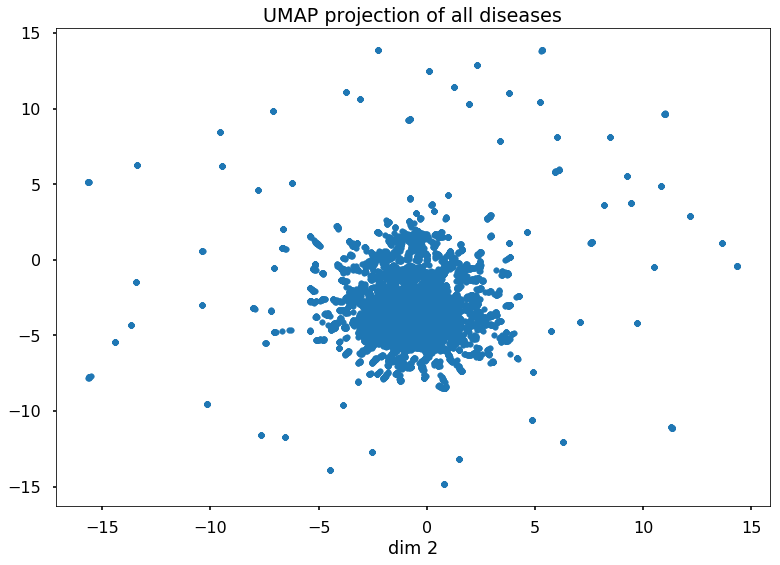

In [188]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
plt.scatter(umap_embeddings[:,0], umap_embeddings[:,1], marker='.')
plt.title('UMAP projection of all diseases')
plt.xlabel('dim 1')
plt.xlabel('dim 2')
plt.savefig('umap_diseases.png')
plt.show()


In [184]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


## Patient medical data g and d:

In [309]:
patient_genes = []
f = open('patient/patient_genes_medicalreport.txt', 'r')
for line in f:
    patient_genes.append(line.split()[0])

In [310]:
len(patient_genes)

31

In [311]:
patient_genes

['ABCB6',
 'ACADL',
 'ACADS',
 'ACOX3',
 'ALDOB',
 'CARD11',
 'CDC42BPA',
 'COX412',
 'CTUI',
 'CY2C19',
 'DLOOP',
 'DNAJC4',
 'DNASE2',
 'FASN',
 'GBA',
 'GJB2',
 'GYG1',
 'HTRA2',
 'IFNL3',
 'LRBA',
 'MGME1',
 'MRPS35',
 'MRPS9',
 'ND1',
 'ND2',
 'NRF1',
 'PDPR',
 'PEX12',
 'RNR1',
 'RYR2',
 'TTN']

In [312]:
for gene in patient_genes:
    print(gene in unique_genes)

True
True
True
False
True
True
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
False
False
True
True
True
True
True
True
True
True


In [313]:
for gggg in unique_genes:
    if gggg.startswith('ACOX'):
        print(gggg)

ACOX1
ACOX2
ACOXL


In [338]:
patient_g = pd.DataFrame(np.zeros((1, len(unique_genes))), columns=unique_genes, index=[0])
for row in patient_genes:
    gene = row
    if gene in unique_genes:
        patient_g[gene].loc[0] = 1.
    #print(gene)

In [339]:
G_patient = np.array(patient_g.loc[0])
d_patient = np.dot(A, G_patient)
d_patient_df = pd.DataFrame(columns=unique_diseases)
d_patient_df.loc['a'] = d_patient


top10_medical = open('top10_medical.txt', 'x')

top10_medical_ids = d_patient_df.sort_values('a',axis=1,ascending=False).columns[:10]
print(top10_medical_ids)
for num, i in enumerate(top10_medical_ids):
    print(num, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0])
    top10_medical.write('{} {}\n'.format(num+1, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0]))

Index(['C3553929', 'C3809394', 'C1856491', 'C1856476', 'C0007642', 'C0031557',
       'C1836705', 'C0162836', 'C4053736', 'C1858763'],
      dtype='object')
0 PEROXISOME BIOGENESIS DISORDER 3A (ZELLWEGER)
1 DYSCHROMATOSIS UNIVERSALIS HEREDITARIA 3
2 Gaucher Disease, Type IIIa
3 Gaucher Disease, Type Iiic
4 Cellulitis
5 Phlegmon
6 Pseudohyperkalemia, Familial, 2, due to Red Cell Leak
7 Hidradenitis Suppurativa
8 Catecholaminergic Polymorphic Ventricular Tachycardia Type 1
9 Cardiomyopathy, Dilated, 1g


## Exome gene mutations:

In [316]:
exome_genes = []
f = open('exome_genes.txt', 'r')
for line in f:
    exome_genes.append(line.split()[0])

In [317]:
exome_genes = list(set(exome_genes))

In [318]:
exome_genes

['C4orf27',
 'PLEKHA6',
 'ATP2B2',
 'IQCE',
 'ABCC1',
 'RP1-283E3.8',
 'OR2T7',
 'LGR6',
 'UGT2A3',
 'TTC13',
 'SIGLEC21P',
 'ESYT2',
 'CYFIP1',
 'FLG-AS1',
 'SPTBN1',
 'RP11-353N4.5',
 'IRX4',
 'CDH8',
 'GLI2',
 'SYNJ2',
 'RFT1',
 'DNAH9',
 'ZNRF3',
 'FSIP2',
 'ANKRD36',
 'OSBPL6',
 'ADAMTS9',
 'RP11-215A19.1',
 'RERE',
 'DCLK1',
 'DRG1',
 'DGKH',
 'RP11-1109M24.5',
 'AGO2',
 'SLC41A3',
 'CCT3',
 'GET4',
 'CTD-2015H3.2',
 'MICAL2',
 'MYO3B',
 'FAM47E-STBD1',
 'RBP7',
 'ADK',
 'GUK1',
 'SCD5',
 'TAF1A',
 'SCFD2',
 'RP11-146N18.1',
 'CASP9',
 'EPRS',
 'KRT18P55',
 'IL23R',
 'CTB-70G10.1',
 'NRG4',
 'RPL22',
 'CCDC168',
 'ATRN',
 'DGKI',
 'TPTE',
 'NLRP3',
 'ARAP3',
 'STRADA',
 'CPZ',
 'IL7',
 'NOMO3',
 'PEPD',
 'CPS1',
 'ABHD5',
 'SGK1',
 'STAG3',
 'EIF2B5',
 'GLS',
 'MLXIPL',
 'C8orf49',
 'PRPSAP2',
 'GCNT2',
 'HLA-A',
 'RP11-804N13.1',
 'PADI4',
 'KLHDC7A',
 'IGFN1',
 'LONRF2',
 'IRF2',
 'FERD3L',
 'SLC30A5',
 'MAP1B',
 'MUC19',
 'TIAM2',
 'CYP3A7',
 'LY6E',
 'DNAH14',
 'MYCT1',
 'RYR

In [330]:
exome_g = pd.DataFrame(np.zeros((1, len(unique_genes))), columns=unique_genes, index=[0])
for row in exome_genes:
    gene = row
    if gene in unique_genes:
        exome_g[gene].loc[0] = 1.
    #print(gene)

In [320]:
exome_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Columns: 9411 entries, A1BG to HBB-LCR
dtypes: float64(9411)
memory usage: 73.6 KB


In [340]:
G_exome = np.array(exome_g.loc[0])
d_exome = np.dot(A, G_exome)
d_exome_df = pd.DataFrame(columns=unique_diseases)
d_exome_df.loc['a'] = d_exome


top10_exome = open('top10_exome.txt', 'x')

top10_exome_ids = d_exome_df.sort_values('a',axis=1,ascending=False).columns[:10]
for num, i in enumerate(top10_exome_ids):
    print(num, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0])
    top10_exome.write('{} {}\n'.format(num+1, gene_disease[gene_disease.diseaseId == i].diseaseName.values[0]))

0 PARKINSON DISEASE 21
1 Ectopia Lentis with Ectopia of Pupil
2 Starvation
3 Familial hypertryptophanemia
4 SVEINSSON CHORIORETINAL ATROPHY
5 CHAR SYNDROME
6 Thyroid Dyshormonogenesis 3
7 Congenital Disorder Of Glycosylation, Type In
8 DYSTONIA 25
9 Polyhydramnios, Megalencephaly, And Symptomatic Epilepsy


In [341]:
top10_all.close()

In [342]:
top10_cardioneuro.close()